# Yearly Fantasy Football Analysis

# Introduction

Fantasy Football is a billion dollar industry that garners around 40 millions users per season. With the influx of advanced statistics emerging from the NFL, new methods and new metrics can be created in order to gain the edge in fantasy football. These metrics can be used to rank players before the draft season, as well as project players before and during the season. The following questions are ones that we aim to analyze in this report:

1. How much does volume matter in Fantasy Football?
2. How volatile are top-end WRs?
3. How volatile are top-end QBs?
4. What are some underlying features of top-tier WRs?
5. Does a heavy workload for RBs account for injuries in the season or following seasons

The group members and their respective contributions are listed below:

- Conor Bradley: Blog Post Report
- Kaathihan Luxmachandran: Blog Post Report
- Pratham Patel: Technical Report
- Tristan Ro: Technical Report

### How does Fantasy Football work?
In order to gain some understanding of the dataset, as well as the conclusions, you must first understand the basics of fantasy football. Before every NFL season, a league is created with players who control a team (the standard sizes of leagues are either 10, 12 or 14 players). Each team is given unique, ordered draft picks and they select real NFL players based on their fantasy production. These players can be from any team, but are unique (once that player is drafted, no other teams in the league can draft him). During the season, real stats from NFL games are used to calculate fantasy points for your players. 


### Description of data 
This dataset was created by FantasyPros. FantasyPros is an extremely reputable company focusing on all fantasy sports, but specializing in fantasy football.

The dataset was accessed via FantasyPros github: https://github.com/fantasydatapros/data 

The dataset was created from combining the yearly data as well as the snap count data. 
It contains all relevant fantasy stats as well as the snap information that may be valuable for further analysis. Scoring of fantasy points is based on standard fantasy scoring. It is important to note that FantasyPros also has weekly data that may be analyzed in the future, but was deemed unnecessary for this report.   

The following table highlights the columns from the dataset that may require some clarification:


| Column | Definition | 
| --- | --- |
| Player | Player Name | 
| Tm | Team the Player is on | 
| Pos | Position of the Player | 
| G | Games played | 
| GS | Games started | 
| Tgt | Targets - number of times a player is thrown the ball | 
| Rec | Receptions - number of times a player caught the ball | 
| Snaps | Total snaps played by the player | 
| TMSnaps | Total number of offensive snaps played by the team  | 
| Snap% | Percentage of snaps the player recorded | 
| Rush% | Percentage of rushes the player recorded, relative to the team | 
| Target% | Percentage of targets the player recorded, relative to the team | 
| FPperSnap | Fantasy points per snap (only for RB, WR and TE) | 




# Data Importation

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: If the data doesn't load, you may need to restart your device

In [3]:
#import data from github

#yearly data
year_2020 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')
year_2019 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
year_2018 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2018.csv')
year_2017 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2017.csv')
year_2016 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2016.csv')
year_2015 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2015.csv')

#snap count data
snap_2020 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2020.csv')
snap_2019 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2019.csv')
snap_2018 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2018.csv')
snap_2017 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2017.csv')
snap_2016 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2016.csv')
snap_2015 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2015.csv')

### Data Cleaning - Before merge

In [4]:
#clean data
#year_2020.drop(columns=['Unnamed: 0'], inplace = True)
year_2019.drop(columns=['Unnamed: 0'], inplace = True)
year_2018.drop(columns=['Unnamed: 0'], inplace = True)
year_2017.drop(columns=['Unnamed: 0'], inplace = True)
year_2016.drop(columns=['Unnamed: 0'], inplace = True)
year_2015.drop(columns=['Unnamed: 0'], inplace = True)

#change heading in snaps for merging
snap_2020.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2019.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2018.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2017.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2016.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2015.rename (columns = {'Name': 'Player'}, inplace = True)

## DataFrame Creation

### Adds yearly column to each dataset

In [5]:
#lists for loops 
listYearly = [year_2020, year_2019, year_2018, year_2017, year_2016, year_2015]
years = [2020, 2019, 2018, 2017, 2016, 2015]

#function adds year col to data
def addYear(data, year):
    data.insert(0, 'Year', year)

#for yearly stats
for i in range(len(listYearly)):
    addYear(listYearly[i],years[i])

### Sort by player name as index

In [6]:
#list for loops
listSnaps = [snap_2020, snap_2019, snap_2018, snap_2017, snap_2016, snap_2015]

#loop through to sort all df by player name
for i in range(len(years)):
    listYearly[i].set_index('Player', inplace = True)
    listSnaps[i].set_index('Player', inplace = True)
    listYearly[i] = listYearly[i][~listYearly[i].index.duplicated()]
    listSnaps[i] = listSnaps[i][~listSnaps[i].index.duplicated()]


In [7]:
# remove duplicate player names from these years
snap_2017 = snap_2017[~snap_2017.index.duplicated()]
snap_2016 = snap_2016[~snap_2016.index.duplicated()]
snap_2015 = snap_2015[~snap_2015.index.duplicated()]
year_2017 = year_2017[~year_2017.index.duplicated()]
year_2016 = year_2016[~year_2016.index.duplicated()]
year_2015 = year_2015[~year_2015.index.duplicated()]

### Add snap count data to yearly data

In [8]:

#functions adds specific data from snaps to yearly
def addSnaps(data,snaps):
    data['Snaps'] = snaps['Snaps']
    data['TMSnaps'] = snaps['TeamSnaps']
    data['Snap%'] = snaps['Snap%']
    data['Rush%'] = snaps['RushPerc']
    data['Target%'] = snaps['TargetP']
    data['FPperSnap'] = snaps['FPPerSnap']

#call for each year
#for i in range(len(years)):
    #addSnaps(listYearly[i], snaps[i])

addSnaps(year_2020, snap_2020)
addSnaps(year_2019, snap_2019)
addSnaps(year_2018, snap_2018)
addSnaps(year_2017, snap_2017)
addSnaps(year_2016, snap_2016)
addSnaps(year_2015, snap_2015)


### Create the dataset

In [9]:
#create dataframe and add years
yearly = year_2020
yearly = yearly.append(year_2019)
yearly = yearly.append(year_2018)
yearly = yearly.append(year_2017)
yearly = yearly.append(year_2016)
yearly = yearly.append(year_2015)

### Clean data - Post Merge

In [10]:
#reset player name back into the DF
yearly.reset_index(level=0, inplace=True)

#set int type to certain col
yearly = yearly.astype({'Age':int,'G':int,'GS':int,'Tgt':int,'Rec':int,'PassingTD':int,'PassingAtt':int,'RushingTD':int,'RushingAtt':int,'ReceivingTD':int, 'Int':int,'Fumbles':int,'FumblesLost':int})

#sort by fantasy points by default
yearly.sort_values(by = 'FantasyPoints' , axis = 0, ascending = False);

# Analysis of the Data

In [11]:
yearly.head()

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FantasyPoints,Int,Fumbles,FumblesLost,Snaps,TMSnaps,Snap%,Rush%,Target%,FPperSnap
0,Derrick Henry,2020,TEN,RB,26,16,16,31,19,0.0,...,314.0,0,3,2,746.0,1123.0,66.43,53.08,4.56,0.43
1,Alvin Kamara,2020,NOR,RB,25,15,10,107,83,0.0,...,295.0,0,1,0,773.0,1161.0,66.58,29.50,14.88,0.42
2,Dalvin Cook,2020,MIN,RB,25,14,14,54,44,0.0,...,294.0,0,5,3,669.0,946.0,70.72,46.64,8.07,0.44
3,Travis Kelce,2020,KAN,TE,31,15,15,145,105,4.0,...,208.0,0,1,1,1088.0,1257.0,86.56,0.00,17.19,0.24
4,Davante Adams,2020,GNB,WR,28,14,14,149,115,0.0,...,243.0,0,1,1,905.0,1061.0,85.30,0.00,19.23,0.30


### Split Dataset into positional sets

In [12]:
#Quarterbacks
byQB = yearly[yearly['Pos'] == 'QB']
byQB = byQB.drop(['Tgt', 'Rec', 'ReceivingYds','ReceivingTD','Snaps', 'TMSnaps','Snap%','Rush%','Target%'], axis = 1)

#Running Backs
byRB = yearly[yearly['Pos'] == 'RB']
byRB = byRB.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps'], axis = 1)

#Wide Receivers
byWR = yearly[yearly['Pos'] == 'WR']
byWR = byWR.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps'], axis = 1)

#Tight Ends
byTE = yearly[yearly['Pos'] == 'TE']
byTE = byTE.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps','RushingAtt','RushingYds', 'RushingTD'], axis = 1)


## Dataset Exploration

### Intro to the Dataset

In [13]:
#total categories
print(list(yearly.head(0)))

['Player', 'Year', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int', 'Fumbles', 'FumblesLost', 'Snaps', 'TMSnaps', 'Snap%', 'Rush%', 'Target%', 'FPperSnap']


In [14]:
#teams have all 32 teams with 2TM and 3TM if they switched teams during the season
yearly['Tm'].unique()

array(['TEN', 'NOR', 'MIN', 'KAN', 'GNB', 'BUF', 'ARI', 'HOU', 'IND',
       'LVR', 'CHI', 'SEA', 'JAX', 'ATL', 'CLE', 'TAM', 'LAC', 'BAL',
       'DAL', 'DEN', 'WAS', 'LAR', 'PIT', 'DET', 'CAR', 'MIA', 'PHI',
       'CIN', 'NWE', 'NYG', 'NYJ', 'SFO', '2TM', 'OAK', '3TM', 'SDG',
       'STL'], dtype=object)

In [15]:
#there are 5 positions, nan indicates unknown data or multiple positions
yearly['Pos'].unique()

array(['RB', 'TE', 'WR', 'QB', nan, '0'], dtype=object)

### Viewing function

Function takes a player name and returns their yearly stats, as well as a plot based on user input ("yes"/"no")

In [16]:
#function takes player name and displays yearly stats
def sort_By_Player(playerName):
    #user input for plots or not
    yearly[yearly['Player'] == playerName]
    plot = input("Would you like to display graphs? (yes/no)")
    #plot info
    if plot == 'yes':
        plt.plot(yearly[yearly['Player'] == playerName]['Year'], yearly[yearly['Player'] == playerName]['FantasyPoints']);
        plt.xticks(np.arange(min(yearly[yearly['Player'] == playerName]['Year']), max(yearly[yearly['Player'] == playerName]['Year'])+1, 1.0))
        plt.xlabel('Year')
        plt.ylabel('Fantasy points')
        plt.title(playerName + "'s fantasy points per year")
        plt.show()
    #return the df
    return yearly[yearly['Player'] == playerName].sort_values(by = 'FantasyPoints' , axis = 0, ascending = False)

In [40]:
#test case
#sort_By_Player('Melvin Gordon')

# Exploratory Data Analysis

## How much does volume matter for fantasy players?

Volume is a massive underlying factor when it comes to fantasy. If a player is seeing 90% of the catches then is he guaranteed to be the best fantasy player in the NFL? To analyze this, the following criteria must be met:

- RB, WR and TE are analyzed, QBs touch the ball everyplay so volume is a non-stat for them
- Players must have scored over 50 fantasy points to qualify to remove noise
- categories such as Snap%, Rush% and Target%
- each position will be looked at seperated and will undergo linear regression

In [18]:
#remove FP under 50 and create new DFs
vol_RB = byRB[byRB['FantasyPoints'] > 50]
vol_WR = byWR[byWR['FantasyPoints'] > 50]
vol_TE = byTE[byTE['FantasyPoints'] > 50]

### Running Backs

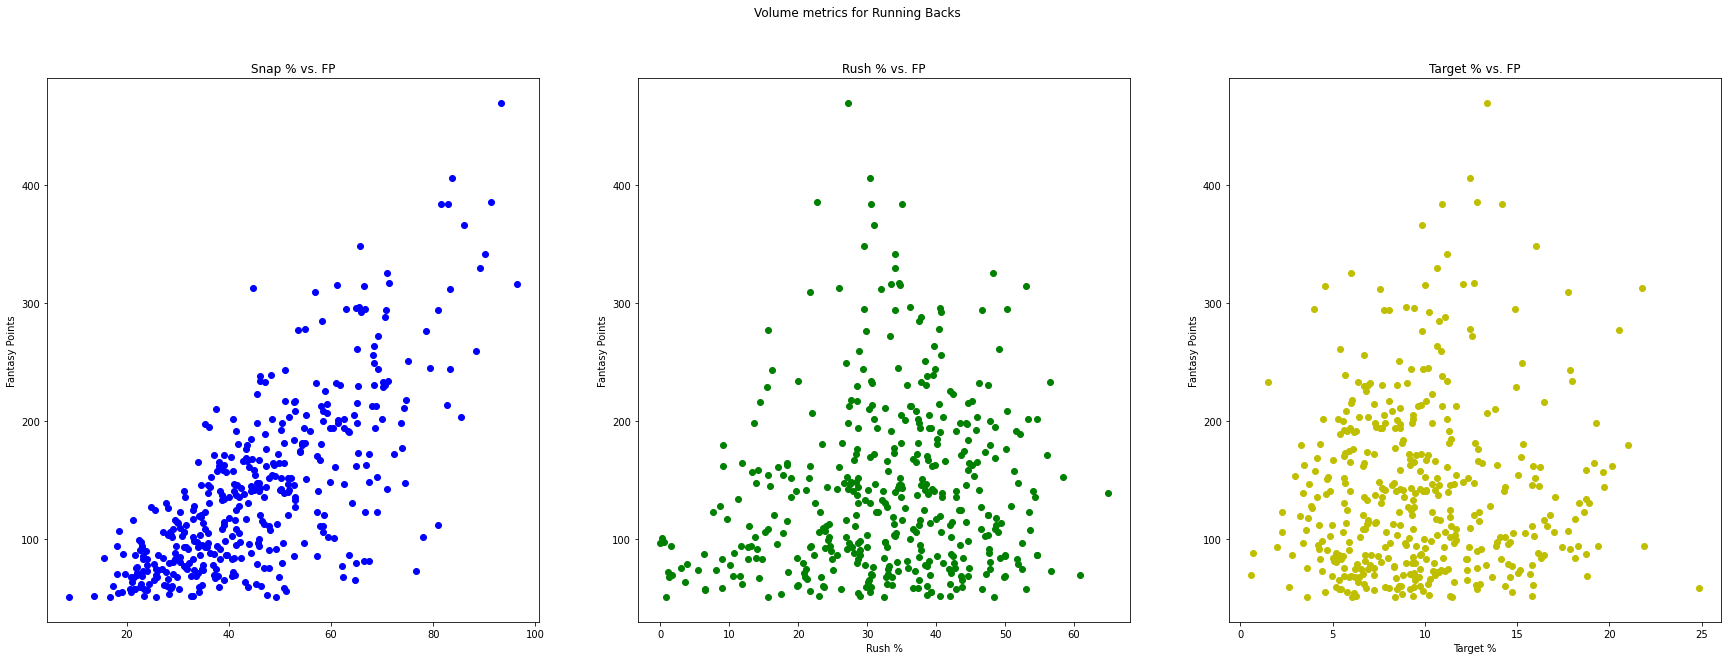

In [19]:
#Create values
x1 = vol_RB['Snap%']
x2 = vol_RB['Rush%']
x3 = vol_RB['Target%']
y = vol_RB['FantasyPoints']

#plot snaps for RBs
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,10))
ax1.scatter(x1, y, c = 'b')
ax2.scatter(x2, y, c = 'g')
ax3.scatter(x3, y, c = 'y')
fig.suptitle('Volume metrics for Running Backs')

#formatting
ax1.title.set_text('Snap % vs. FP')
ax2.title.set_text('Rush % vs. FP')
ax3.title.set_text('Target % vs. FP')
ax1.set( label = "Snap %", ylabel = "Fantasy Points")
ax2.set(xlabel = "Rush %", ylabel = "Fantasy Points")
ax3.set(xlabel = "Target %", ylabel = "Fantasy Points");

### For Wide Receivers

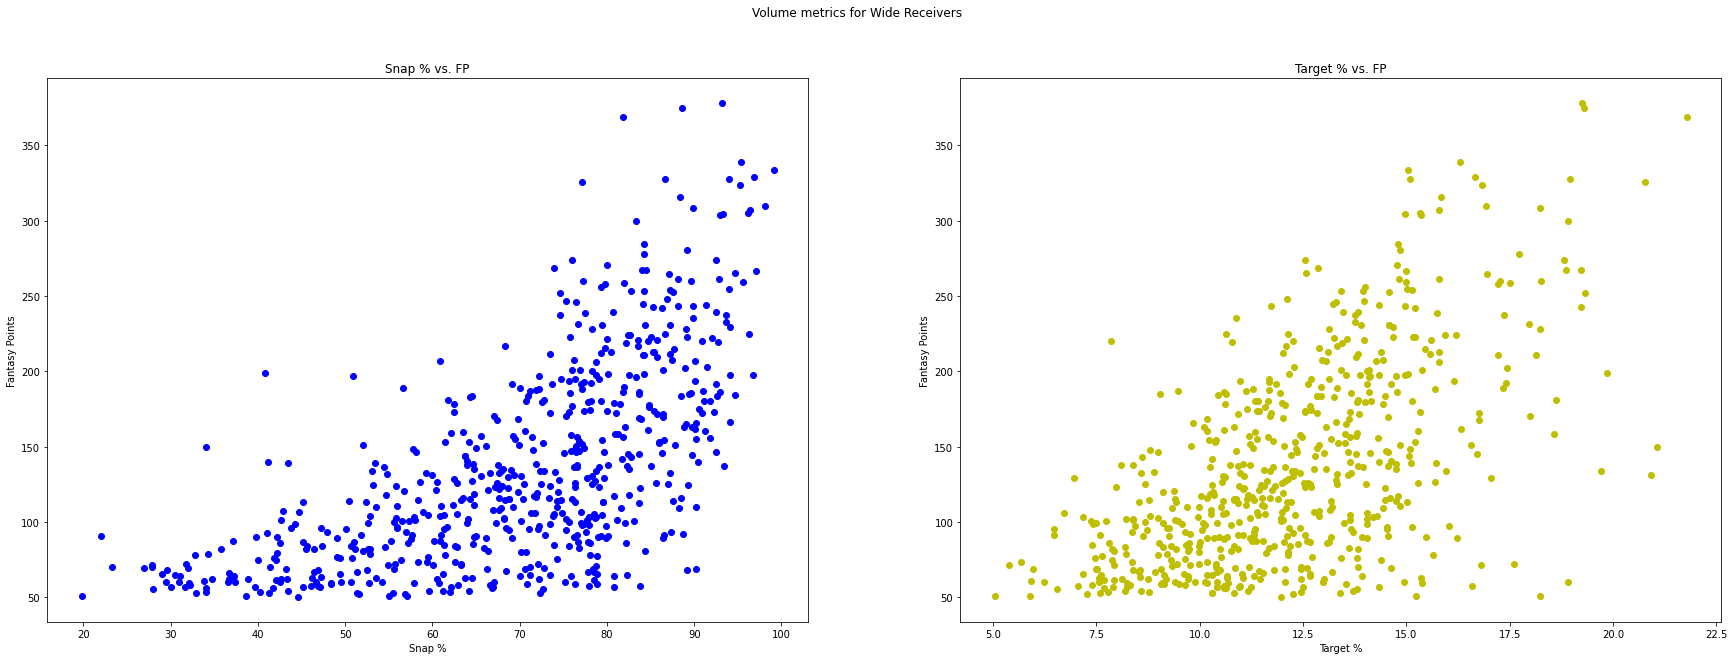

In [20]:
#Create values
x1 = vol_WR['Snap%']
x2 = vol_WR['Target%']
y = vol_WR['FantasyPoints']

#plot snaps for WRs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))

ax1.scatter(x1, y, c = 'b')
ax2.scatter(x2, y, c = 'y')
fig.suptitle('Volume metrics for Wide Receivers')

#plot snaps for WRs
ax1.title.set_text('Snap %')
ax2.title.set_text('Target %')

#formatting
ax1.set_title('Snap % vs. FP')
ax2.set_title('Target % vs. FP')
ax1.set( xlabel = "Snap %", ylabel = "Fantasy Points")
ax2.set( xlabel = "Target %", ylabel = "Fantasy Points");

### For Tight Ends

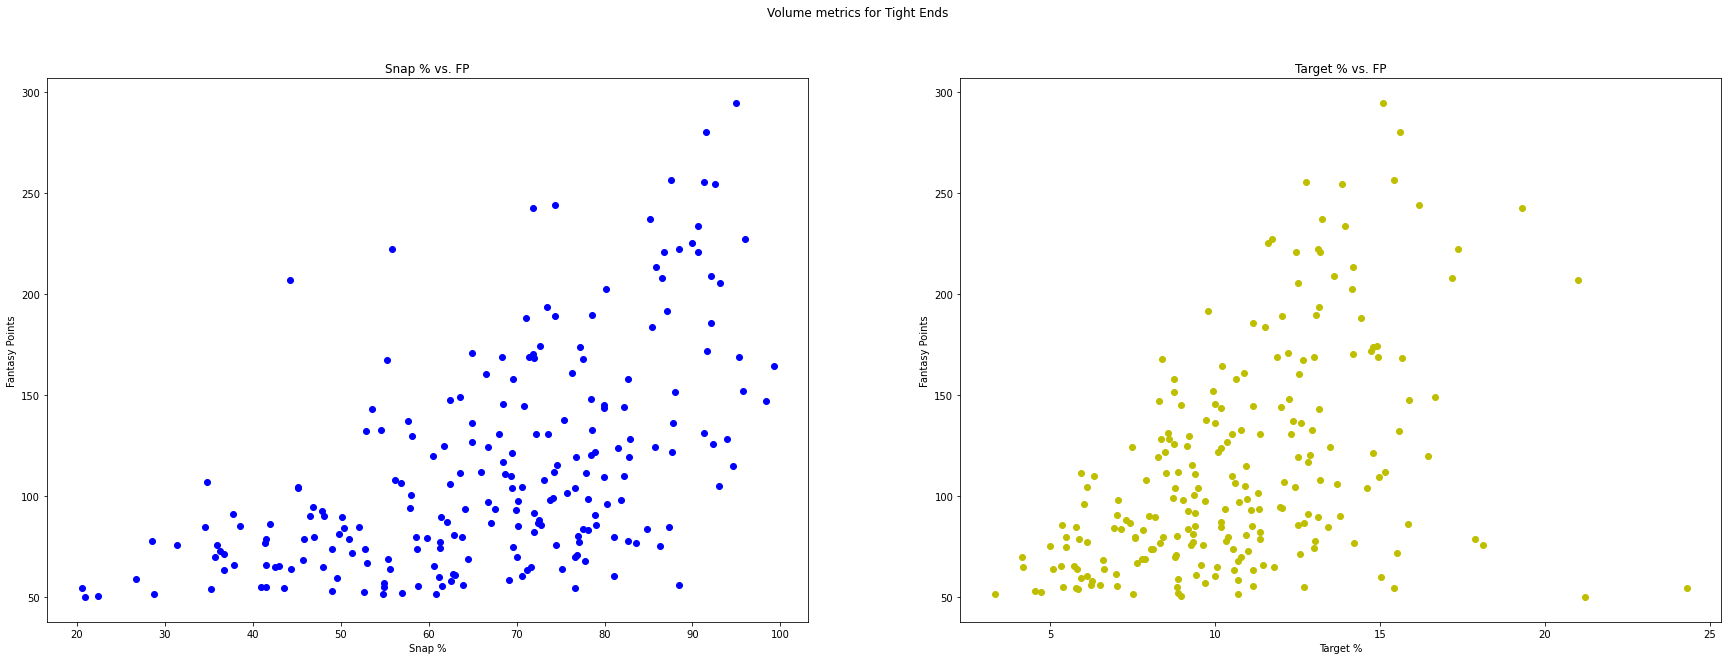

In [21]:
#Create values
x1 = vol_TE['Snap%']
x2 = vol_TE['Target%']
y = vol_TE['FantasyPoints']

#plot snaps for WRs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))

ax1.scatter(x1, y, c = 'b')
ax2.scatter(x2, y, c = 'y')
fig.suptitle('Volume metrics for Tight Ends')

#plot snaps for WRs
ax1.title.set_text('Snap %')
ax2.title.set_text('Target %')

#axis
ax1.set_title('Snap % vs. FP')
ax2.set_title('Target % vs. FP')
ax1.set(xlabel = "Snap %", ylabel = "Fantasy Points")
ax2.set(xlabel = "Target %", ylabel = "Fantasy Points");

From first glance, a player's snap percentage is positively correlated with their fantasy points for running backs, wide receivers and tight ends. For running backs, both target and rush percentage seem to have no correlation with fantasy points. For wide receivers and tight ends, target percentage seems to have a slight positive correlation with fantasy points, but not as clear as snap percentage. The next steps would be to perform linear regression in order to apply data science concepts to these relations. 

## How volatile are the top-tier Wide Receivers?

The wide receiver is a highly valuable position, as they have they tend to score a lot of the touchdowns on a football team. However, how valuable is having a "top-tier" wide receiver in fantasy football?

To find out the importance of having a top-tier wide receiver in fantasy football, a series of line graphs were created to analyze the performance of the top 10 wide receivers of each year from 2015 - 2020. These graphs were created for the purpose of observing fluctuations and the predictability of wide receivers from year to year.

### Observing the fluctuation in fantasy points of the top 10 wide receivers in each year

In [22]:
# creating a list of dataframes for each year, with wide recievers
WR_yearly = []
for i in range(2015, 2021):
    WR_yearly.append(byWR[byWR['Year'] == i])
    WR_yearly[i-2015] = WR_yearly[i-2015].sort_values('FantasyPoints',ascending=False)

# make a dataframe that groups players by name and year. (since all are unique, nothing actually gets summed)
WR_all_years = pd.concat([WR_yearly[0],WR_yearly[1],WR_yearly[2],WR_yearly[3],WR_yearly[4],WR_yearly[5]],
                         ignore_index=True)
WR_all_years = WR_all_years.groupby(['Player','Year']).sum()


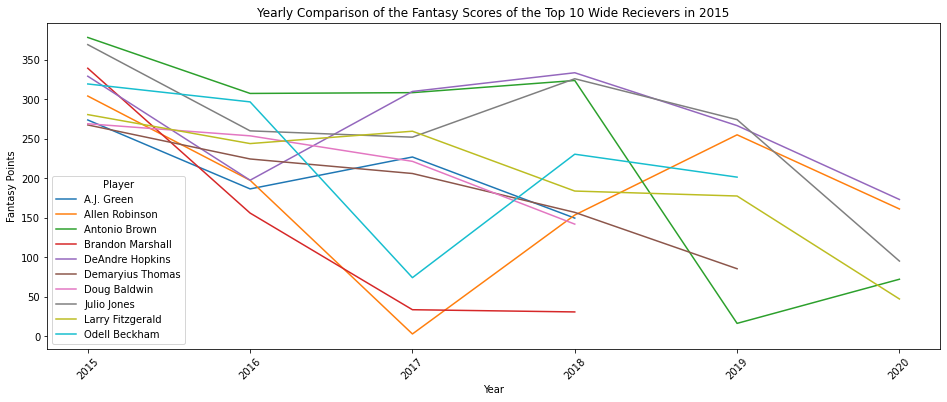

In [42]:
# find top 10 wide receivers of 2015
top_WR_2015 = WR_yearly[0][:10].Player
top_WR_2015 = WR_all_years.loc[top_WR_2015]

# create a pivot table to store the top 10 players' scores throughout 2015-2020
WR_2015_pivot = pd.pivot_table(top_WR_2015, values='FantasyPoints',index='Year', columns=['Player'])
WR_2015_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2015");

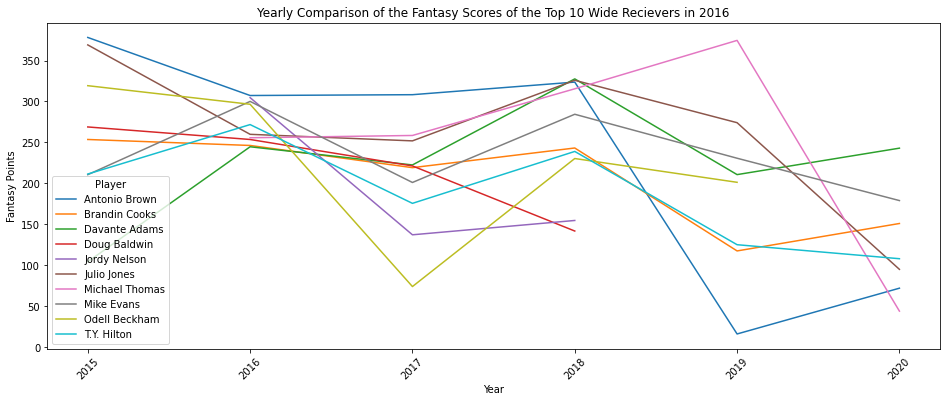

In [24]:
# find top 10 wide receivers of 2016
top_WR_2016 = WR_yearly[1][:10].Player
top_WR_2016 = WR_all_years.loc[top_WR_2016]

# create a pivot table to store the 2016 top 10 players' scores throughout 2015-2020
WR_2016_pivot = pd.pivot_table(top_WR_2016, values='FantasyPoints',index='Year', columns=['Player'])
WR_2016_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2016");

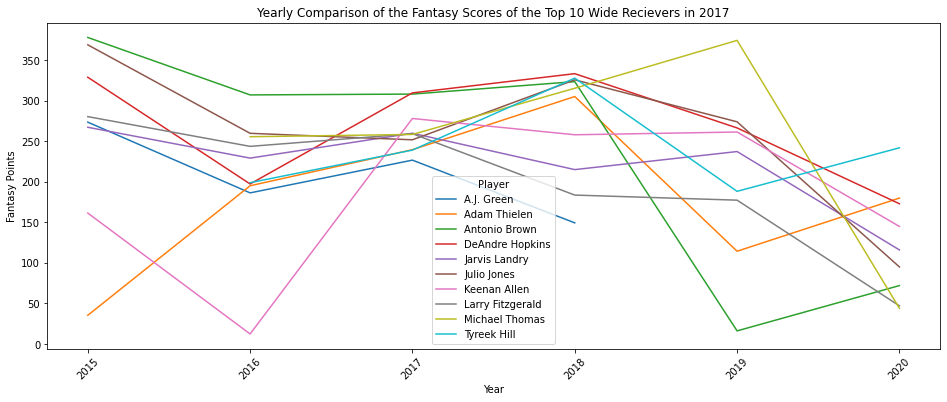

In [25]:
# find top 10 wide receivers of 2017
top_WR_2017 = WR_yearly[2][:10].Player
top_WR_2017 = WR_all_years.loc[top_WR_2017]

# create a pivot table to store the 2017 top 10 players' scores throughout 2015-2020
WR_2017_pivot = pd.pivot_table(top_WR_2017, values='FantasyPoints',index='Year', columns=['Player'])
WR_2017_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2017");

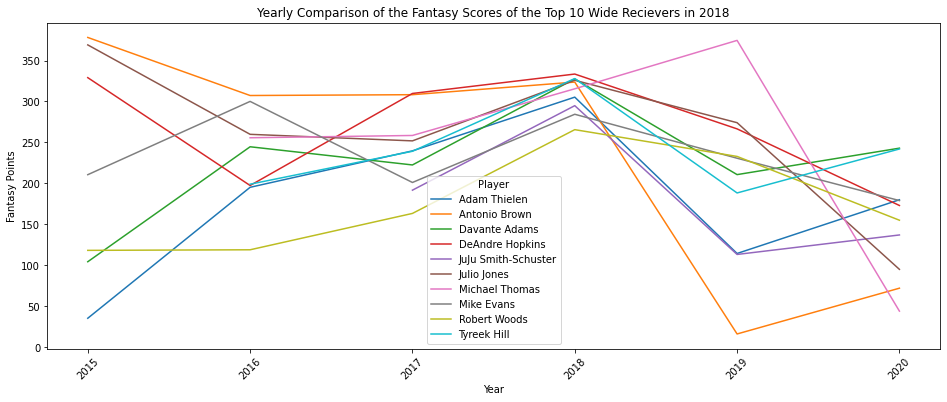

In [26]:
# find top 10 wide receivers of 2018
top_WR_2018 = WR_yearly[3][:10].Player
top_WR_2018 = WR_all_years.loc[top_WR_2018]

# create a pivot table to store the 2018 top 10 players' scores throughout 2015-2020
WR_2018_pivot = pd.pivot_table(top_WR_2018, values='FantasyPoints',index='Year', columns=['Player'])
WR_2018_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2018");

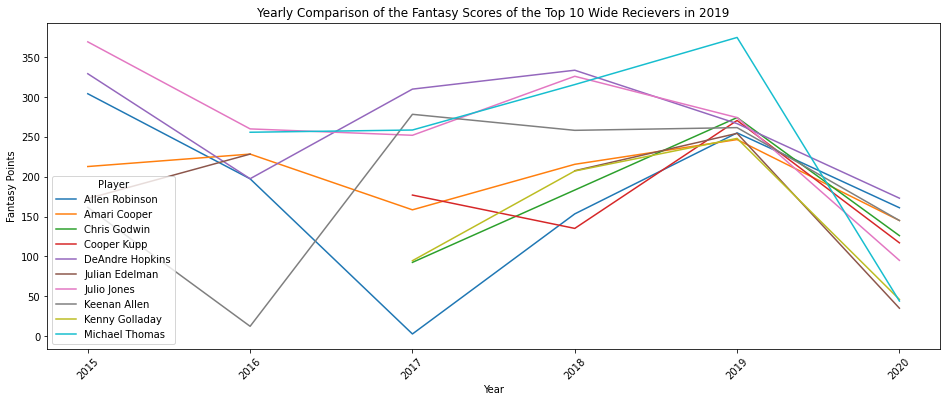

In [27]:
# find top 10 wide receivers of 2019
top_WR_2019 = WR_yearly[4][:10].Player
top_WR_2019 = WR_all_years.loc[top_WR_2019]

# create a pivot table to store the 2019 top 10 players' scores throughout 2015-2020
WR_2019_pivot = pd.pivot_table(top_WR_2019, values='FantasyPoints',index='Year', columns=['Player'])
WR_2019_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2019");

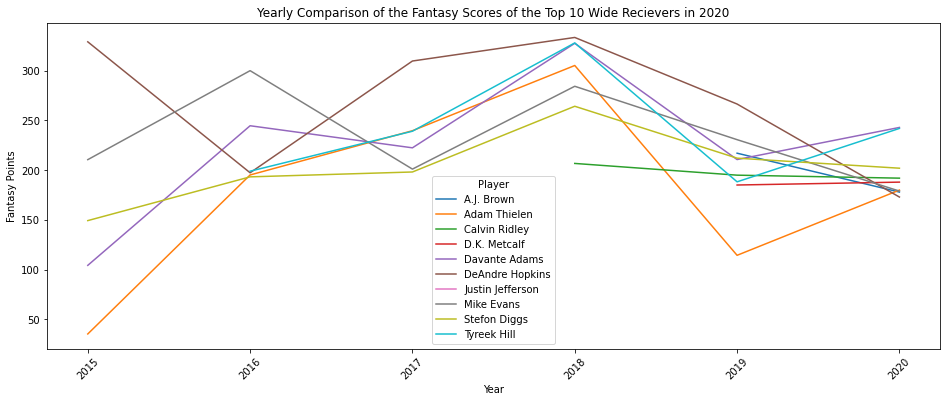

In [28]:
# find top 10 wide receivers of 2020
top_WR_2020 = WR_yearly[5][:10].Player
top_WR_2020 = WR_all_years.loc[top_WR_2020]

# create a pivot table to store the 2020 top 10 players' scores throughout 2015-2020
WR_2020_pivot = pd.pivot_table(top_WR_2020, values='FantasyPoints',index='Year', columns=['Player'])
WR_2020_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 10 Wide Recievers in 2020");

The plots above show how the fantasy points of top-tier receviers fluctuated quite a bit in the years 2015 - 2020. When the scores drop to almost 0, such as with Allen Robinson in 2017, it is a strong indicator that the player got injured. Overall, these line graphs also show a trend of the fantasy scores decreasing over time, especially in 2015. This steady decline in fantasy points can likely be attributed to players peaking for a short period of time, possibly due to aging. 

### Standard deviation in the fantasy score of the top 10 wide receivers from 2015 - 2020

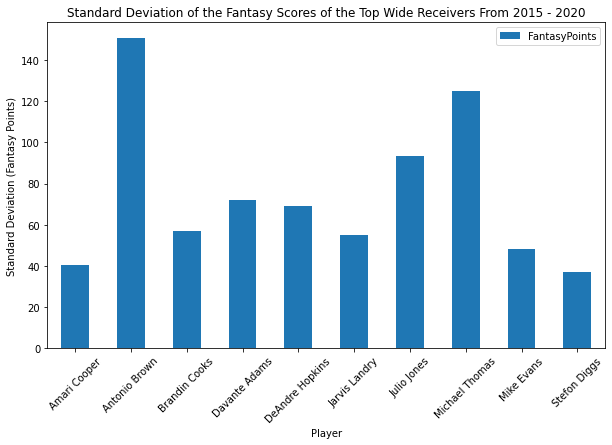

In [29]:
# find top 10 players from 2015 - 2020 (based on sum of points)
top_WR_all = WR_all_years.reset_index(level='Year')
top_WR = top_WR_all.groupby('Player').sum().FantasyPoints.sort_values(ascending=False)[:10].index
top_WR = top_WR_all.loc[top_WR]
# find the std of the values from year to year
top_WR_std = top_WR.groupby('Player').std()
# put the std of the fantasy scores into a pivot table, then plot
top_WR_std = pd.pivot_table(top_WR_std, values='FantasyPoints',index='Player')
top_WR_std.plot(kind='bar', figsize=(10,6), ylabel="Standard Deviation (Fantasy Points)",
                      title="Standard Deviation of the Fantasy Scores of the Top Wide Receivers From 2015 - 2020",
                      rot=45);

This standard deviation graph shows that Antonio Brown, Michael Thomas and Julio Jones are the top 3 highest fluctuating wide receivers out of the top 10 from 2015 - 2020. This doesn't paint the full picture of these players however, as Antonio Brown was consistently a top end WR for 4 years from 2015 - 2018, but fell off hard after that due to his off-field issues. Overall, the standard deviation and line graphs show that the majority of highly performing wide receivers are somewhat predictable, however there is a risk of top players falling off completely. Since injury is a massive factor for wide receivers fluctuation, the next steps would be to find if there exist any statistics that would correlate with a wide receiver getting injured.

## How volatile are the top end quarterbacks?

The quarterback plays one of the most important roles on a football team. However, is there a big difference between a top-tier quarterback and a decent one in fantasy football? 

The top 10 quarterbacks from years 2016 - 2018 were compared with the 30th - 21st ranked quarterbacks in those years to see how they compare in terms of volatility and the gap in their stats. 

There is a interesting theory that states to either take one of the top five QBs in the draft, or completely wait until the later rounds. By determining the consistency of these quarterbacks, it can give some reason to take one of these quarterbacks in the draft. 

### How much do top end QBs fluctuate?

In [30]:
# creating a list of dataframes for each year, with quarterbacks
QB_yearly = []
for i in range(2015, 2021):
    QB_yearly.append(byQB[byQB['Year'] == i])
    QB_yearly[i-2015] = QB_yearly[i-2015].sort_values('FantasyPoints',ascending=False)

# make a dataframe that groups players by name and year. (since all are unique, nothing actually gets summed)
QB_all_years = pd.concat([QB_yearly[0],QB_yearly[1],QB_yearly[2],QB_yearly[3],QB_yearly[4],QB_yearly[5]],
                         ignore_index=True)
QB_all_years = QB_all_years.groupby(['Player','Year']).sum()

In [31]:
# Seeing how many unique top end QBs there are from 2015 - 2020
QB_top_all_years = pd.concat([QB_yearly[0][:10],QB_yearly[1][:10],QB_yearly[2][:10],QB_yearly[3][:10],QB_yearly[4][:10],
                              QB_yearly[5][:10]],ignore_index=True)
num_unique_QB = QB_top_all_years.Player.nunique()
print('There are',num_unique_QB,'unique quarterbacks in the top 10s from 2015-2020 out of a possible maximum of 60' 
      ,'unique quarterbacks')

There are 27 unique quarterbacks in the top 10s from 2015-2020 out of a possible maximum of 60 unique quarterbacks


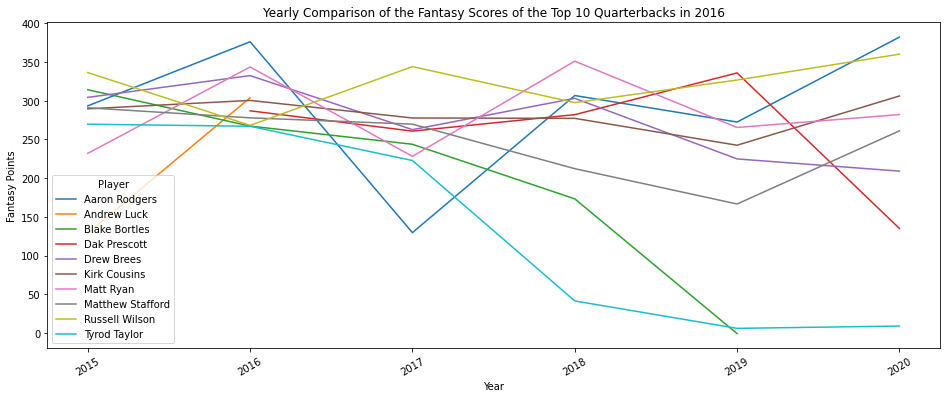

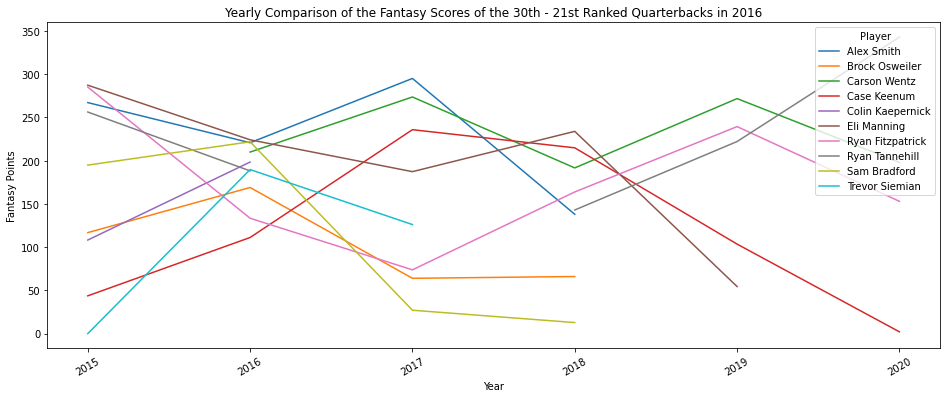

In [32]:
# find top 10 quarterbacks of 2016
top_QB_2016 = QB_yearly[1][:10].Player
top_QB_2016 = QB_all_years.loc[top_QB_2016]

# create a pivot table to store the 2016 S-tier players' scores throughout 2015-2020
QB_2016_pivot = pd.pivot_table(top_QB_2016, values='FantasyPoints',index='Year', columns=['Player'])
QB_2016_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the Top 10 Quarterbacks in 2016")

# find A-tier quarterbacks in 2016
mid_QB_2016 = QB_yearly[1][20:30].Player
mid_QB_2016 = QB_all_years.loc[mid_QB_2016]

# create a pivot table to store the 2016 A-tier players' scores throughout 2015-2020
QB_2016_pivot = pd.pivot_table(mid_QB_2016, values='FantasyPoints',index='Year', columns=['Player'])
QB_2016_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the 30th - 21st Ranked Quarterbacks in 2016");

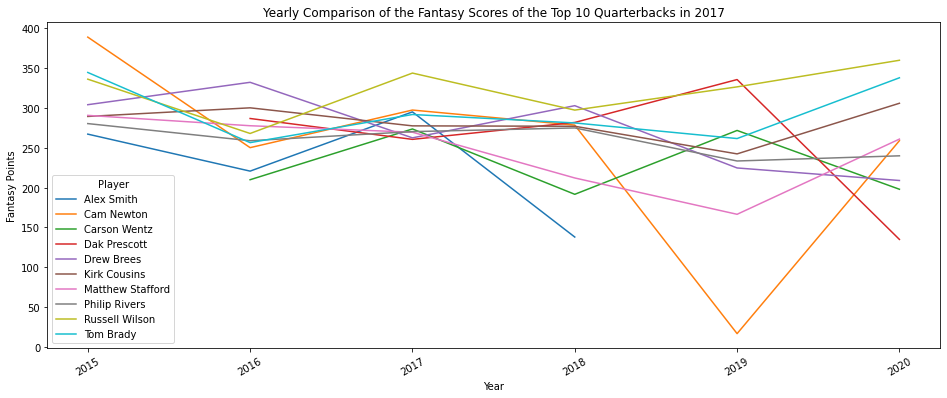

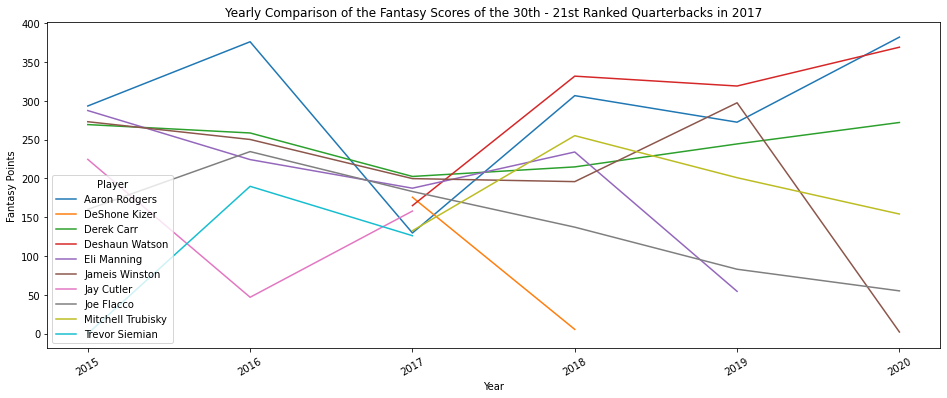

In [33]:
# find top 10 quarterbacks of 2017
top_QB_2017 = QB_yearly[2][:10].Player
top_QB_2017 = QB_all_years.loc[top_QB_2017]

# create a pivot table to store the 2017 S-tier players' scores throughout 2015-2020
QB_2017_pivot = pd.pivot_table(top_QB_2017, values='FantasyPoints',index='Year', columns=['Player'])
QB_2017_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the Top 10 Quarterbacks in 2017")

# find A-tier quarterbacks in 2017
mid_QB_2017 = QB_yearly[2][20:30].Player
mid_QB_2017 = QB_all_years.loc[mid_QB_2017]

# create a pivot table to store the 2017 A-tier players' scores throughout 2015-2020
QB_2017_pivot = pd.pivot_table(mid_QB_2017, values='FantasyPoints',index='Year', columns=['Player'])
QB_2017_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the 30th - 21st Ranked Quarterbacks in 2017");

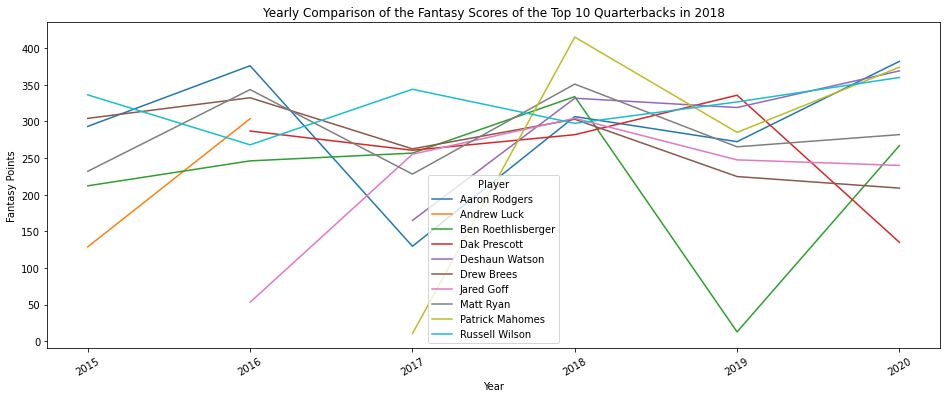

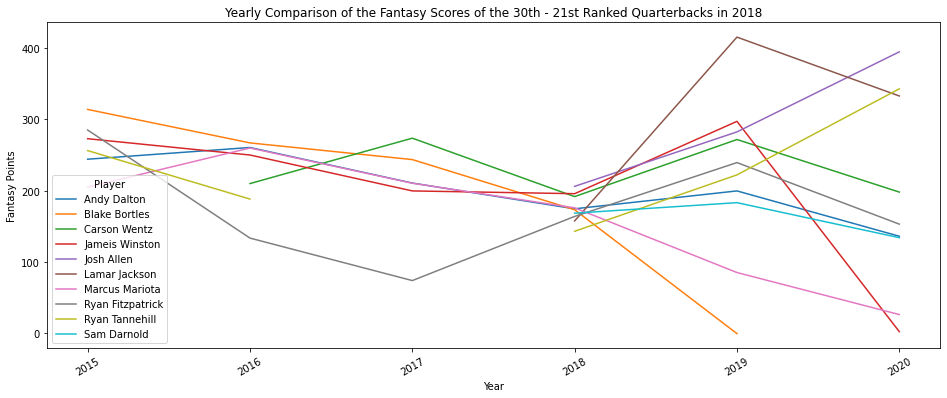

In [34]:
# find top 10 quarterbacks of 2018
top_QB_2018 = QB_yearly[3][:10].Player
top_QB_2018 = QB_all_years.loc[top_QB_2018]

# create a pivot table to store the 2018 S-tier players' scores throughout 2015-2020
QB_2018_pivot = pd.pivot_table(top_QB_2018, values='FantasyPoints',index='Year', columns=['Player'])
QB_2018_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the Top 10 Quarterbacks in 2018")

# find A-tier quarterbacks in 2018
mid_QB_2018 = QB_yearly[3][20:30].Player
mid_QB_2018 = QB_all_years.loc[mid_QB_2018]

# create a pivot table to store the 2018 A-tier players' scores throughout 2015-2020
QB_2018_pivot = pd.pivot_table(mid_QB_2018, values='FantasyPoints',index='Year', columns=['Player'])
QB_2018_pivot.plot(kind='line',figsize=(16,6),ylabel="Fantasy Points", rot=30, title="Yearly Comparison of the Fantasy Scores of the 30th - 21st Ranked Quarterbacks in 2018");

Overall, the top 10 quarterbacks fluctuated in fantasy scores noticeably less than the 30th - 21st ranked quarterbacks. The fluctuation in the top 10 quarterbacks was also noticeably less than the fluctuation in the top 10 wide receivers. One factor that may explain this discrepancy in fluctuations between quarterbacks and wide receivers is the rate of injury between the two positions. Further analysis would be needed to study the injury rates between quarterbacks and wide receivers, however. Another trend that is different between the quarterbacks and wide receivers is that there isn't a noticeable drop in performance in the later years for top end quarterbacks. This might indicate that quarterbacks peak in performance longer than wide receivers do, though more data would be needed to confirm this.

### Gap between top-tier and mid-tier QBs

In [35]:
# Getting S-tier QBs
QB_top_all_years = QB_top_all_years.groupby(['Player','Year']).sum()
QB_top_all_years = QB_top_all_years.sort_values('FantasyPoints',ascending=False)
# Getting A-tier QBs
QB_mid_all_years = pd.concat([QB_yearly[0][20:30],QB_yearly[1][20:30],QB_yearly[2][20:30],QB_yearly[3][20:30],QB_yearly[4][20:30],
                              QB_yearly[5][20:30]],ignore_index=True)
QB_mid_all_years = QB_mid_all_years.groupby(['Player','Year']).sum()
# Showing the difference in stats
QB_gap = pd.concat([np.round(QB_top_all_years.mean(),2),np.round(QB_mid_all_years.mean(),2)],axis=1).transpose()
QB_gap.index = ['10th - 1st','21st - 30th']
QB_gap.drop(columns=['Age','G','GS','Int','Fumbles','FumblesLost','FPperSnap'],inplace=True)
QB_gap

,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,FantasyPoints
10th - 1st,4209.18,30.77,548.57,302.05,3.22,62.48,316.07
21st - 30th,2731.88,16.15,394.67,170.08,1.63,37.77,175.08


The gap between the top 10 quarterbacks and the 20th - 30th ranked quarterbacks is relatively large, with the mean passing yards of the top end quarterbacks being 64% higher than that of the 21st - 30th ranked quarterbacks and fantasy points also being 55% higher. Overall, this data and the line graphs above shows just how important it is to obtain a top 10 quarterback in fantasy drafts.

## What features do top-tier wide receivers have in common?

As seen in the study above, top-tier fantasy wide receviers are pretty inconsistent over a long period of time. In an effort to identify underlying features of fantasy wide receivers, further analysis will be conducted. 
Stats such as receiving yards, TDs and receptions are all obvious indicators of fantasy success. Stats such as targets, snap percentage and target percentage are the metrics that may identify undervalued receivers.
- Tier 1 WRs: 1 - 14
- Tier 2 WRs: 15 - 28
- Tier 3 WRs: 29 - 42

In [36]:
#create df for tiers of WRs

#create df fpr all tier 1 Wrs
tier1_WR = byWR[byWR['Year'] == 2015][:14]
for i in range(2016,2020):
    tier1_WR = tier1_WR.append(byWR[byWR['Year'] == i][:14])

#create df fpr all tier 2 Wrs
tier2_WR = byWR[byWR['Year'] == 2015][14:28]
for i in range(2016,2020):
    tier2_WR = tier2_WR.append(byWR[byWR['Year'] == i][14:28])

#create df fpr all tier 3 Wrs
tier3_WR = byWR[byWR['Year'] == 2015][29:42]
for i in range(2016,2020):
    tier3_WR = tier3_WR.append(byWR[byWR['Year'] == i][29:42])

In [37]:
#find key metrics for each tier of WR

#FPs
FPs_WR1 = "{:.2f}".format(tier1_WR['FantasyPoints'].mean())
FPs_WR2 = "{:.2f}".format(tier2_WR['FantasyPoints'].mean())
FPs_WR3 = "{:.2f}".format(tier3_WR['FantasyPoints'].mean())

#targets
targets_WR1 = "{:.2f}".format(tier1_WR['Tgt'].mean())
targets_WR2 = "{:.2f}".format(tier2_WR['Tgt'].mean())
targets_WR3 = "{:.2f}".format(tier3_WR['Tgt'].mean())

#receptions
rec_WR1 = "{:.2f}".format(tier1_WR['Rec'].mean())
rec_WR2 = "{:.2f}".format(tier2_WR['Rec'].mean())
rec_WR3 = "{:.2f}".format(tier3_WR['Rec'].mean())

#Receiving yards
yards_WR1 = "{:.2f}".format(tier1_WR['ReceivingYds'].mean())
yards_WR2 = "{:.2f}".format(tier2_WR['ReceivingYds'].mean())
yards_WR3 = "{:.2f}".format(tier3_WR['ReceivingYds'].mean())

#TDs
TDs_WR1 = "{:.2f}".format(tier1_WR['ReceivingTD'].mean())
TDs_WR2 = "{:.2f}".format(tier2_WR['ReceivingTD'].mean())
TDs_WR3 = "{:.2f}".format(tier3_WR['ReceivingTD'].mean())

#snap%
snapP_WR1 = "{:.2f}".format(tier1_WR['Snap%'].mean())
snapP_WR2 = "{:.2f}".format(tier2_WR['Snap%'].mean())
snapP_WR3 = "{:.2f}".format(tier3_WR['Snap%'].mean())

#target share 
tarP_WR1 = "{:.2f}".format(tier1_WR['Target%'].mean())
tarP_WR2 = "{:.2f}".format(tier2_WR['Target%'].mean())
tarP_WR3 = "{:.2f}".format(tier3_WR['Target%'].mean())

#create df to display results
data = {'WR tier': ['Tier 1', 'Tier 2', 'Tier 3'],
        'Avg Fantasy Points': [FPs_WR1, FPs_WR2 ,FPs_WR3], 
        'Avg Targets': [targets_WR1, targets_WR2 ,targets_WR3],
        'Avg Receptions': [rec_WR1, rec_WR2 ,rec_WR3],
        'Avg Receiving yards': [yards_WR1, yards_WR2 ,yards_WR3],
        'Avg TDs': [TDs_WR1, TDs_WR2, TDs_WR3],
        'Avg Snap%': [snapP_WR1, snapP_WR2, snapP_WR3],
        'Avg Target%': [tarP_WR1, tarP_WR2, tarP_WR3],}
display = pd.DataFrame(data)
display

,WR tier,Avg Fantasy Points,Avg Targets,Avg Receptions,Avg Receiving yards,Avg TDs,Avg Snap%,Avg Target%
0,Tier 1,271.77,142.00,92.11,1260.49,8.80,86.72,15.28
1,Tier 2,205.99,114.09,70.31,941.44,6.11,80.68,14.02
2,Tier 3,171.22,97.57,60.31,797.18,4.97,77.18,12.78


The most interesting findings is the gap between tier 1 and tier 2 wide receivers. Tier 1 WRs score 66 more fantasy points, record 28 more targets, 22 more receptions, 319 more yards more than tier 2 WRs. This is a larger gap than anticipated, and reveals just how important it is to obtain a tier 1 WR. Tier 2 WRs aren't that much better than Tier 3 receivers and this can be applied to drafting strategy. The snap percentages for each tier also follow the same gap trend, but the biggest difference is in the target share. All tiers of wide receivers have a target share of over 11% which was unexpected. The results indicate that any WR with a target share greater than 11% is almost always a safe bet. 

## Does a heavy workload for RBs account for injuries in the season or following seasons?

Injuries for Running Backs are nothing new and are a big factor in determining their value. As seen in the previous analysis, having more touches is beneficial for fantasy purposes, but at what cost? The following steps were taken to determine if a running back is prone to an injury in the following seasons.
The definition of a "heavy workload" has changed pretty durastically from year to year, for consistency;
- RBs with over 170 carries will be considered as having "heavy-workloads"
- An "injured" is classified as one who misses at least 3 games

In [39]:
# define new DF for "Workhorse" RBs
workHorse = byRB[byRB['RushingAtt'] > 170]
# create df for all RBs indexed by player,year
allRB = byRB.groupby(['Player','Year']).sum()
# remove heavy workload indexes in 2020
workHorse = workHorse[~(workHorse['Year']==2020)]
# create a set of keys that correspond to years proceeding heavy workload years
workHorsePlayers = list(workHorse.Player)
workHorseYears = list(workHorse.Year + 1)
playerYearKeys = list(zip(workHorsePlayers, workHorseYears))
# dataframe containing years right after a heavy load year
allRB = allRB.loc[allRB.index.intersection(playerYearKeys)]
totalHeavyRB = len(allRB)
#find RBs that missed at least 3 games 
injury = allRB[allRB['G'] <= (max(allRB['G'])-3)]
totalInjure = len(injury)
injuryRatio = (totalInjure/totalHeavyRB) * 100
print(int(injuryRatio), "% of RBs were injured after a heavy workload season")
injury

43 % of RBs were injured after a heavy workload season


,,Age,G,GS,Tgt,Rec,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Fumbles,FumblesLost,Snap%,Rush%,Target%,FPperSnap
Player,Year,,,,,,,,,,,,,,,,,
Adrian Peterson,2016,31,3,3,6,3,72.0,0,37,8.0,0,9.0,1,1,27.36,44.05,7.14,0.07
Alex Collins,2018,24,10,10,21,15,411.0,7,114,105.0,1,108.6,3,3,41.36,36.66,6.75,0.30
Bilal Powell,2018,30,7,7,18,11,343.0,0,80,110.0,1,60.3,2,1,46.31,38.65,8.70,0.24
C.J. Anderson,2018,27,11,3,9,5,403.0,2,67,41.0,1,67.4,0,0,0.00,0.00,0.00,0.00
Carlos Hyde,2020,30,10,1,20,16,356.0,4,81,93.0,0,69.0,1,0,37.08,30.69,7.22,0.25
Chris Carson,2020,26,12,12,46,37,681.0,5,141,287.0,4,151.0,1,0,52.26,34.81,10.64,0.35
Chris Ivory,2016,28,11,1,28,20,439.0,3,117,186.0,0,94.5,5,3,41.41,37.62,9.00,0.24
Chris Johnson,2016,31,4,0,1,0,95.0,1,25,0.0,0,15.5,0,0,14.69,59.52,2.38,0.37
Christian McCaffrey,2020,24,3,3,19,17,225.0,5,59,149.0,1,73.0,0,0,76.68,34.50,11.11,0.43


Based on the results, it was determined that 43% of "heavy-workload" running backs got injured (missed more than 3 games) in the following seasons. Our definition of a heavy-workload is somewhat subjective, but decided to set the cutoff mark at 170 carries. There are other metrics that could be measured for "heavy-workload" RBs such as snaps, but carries almost guarentees contact from a defender and is a more accurate representation of the where and tear on their bodies. Also players missing at least three games, does not guarentee that they got injuried. Suspensions, illness and other factors can cause a player to miss games, but it would be unusual if a player missed more than three games without an injury. 

# Potential Data Science

The data science applications in fantasy football have extreme potential. As mentioned above, the weekly and strength of schedule data could be included in order to further investigate fantasy production from players. 

By creating a model using data science techniques, both weekly and yearly projections could also be created. This would be crucial in providing pre-draft rankings and weekly scoring outputs in order to predict breakout/undervalued players. Most major websites project the fantasy points for each player, however implementing a range might be more informative for the users as touchdowns (6 points) can easily skew the results. 

Creating an injury designation could be implemented as well. As seen in the study above, 43% of workhorse RBs get injured in the following seasons. Further analysis of injuries could lead to a predictive model that could help the pre-draft process for users. For example, “Player A has a 25% chance to miss 5 games this season”. Ethically, it isn’t right to assign probability to an injury, but nevertheless, injuries are a crucial part of fantasy football.  

Another data science application would be to create an algorithm that could give suggestions during a user’s draft. This algorithm would take into account the user’s current team and the players left on the board. Implementation would be quite complex as there are a variety of factors to take into account. Additionally, most drafts allow one minute per pick, so the algorithm would need to be very efficient in both time and space. 


# Conclusion 

Some limitations were seen when analyzing the proposed research questions, specifically, the definition of a heavy-workload for running backs. By just using carries as the criteria, it doesn’t depict an accurate definition. Other metrics such as total snaps, and receptions would need to be analyzed as well. In the future, creating an equation to determine heavy-workload would create a more accurate sample. A general limitation of the data is that the NFL changes drastically from year to year. Recent trends such as running the ball less and passing more can make it difficult to project stats. 

There were a multitude of results that were very insightful. From the volume study, it was predicted that the rush percentage would have a larger effect on fantasy points for running backs. But indicated by the plot, it shows there is little to no correlation between the two. For wide receivers and tight ends, there is a fairly positive correlation between target share and fantasy points which was expected. All positions have a positive correlation with snap percentage which was also expected. 

When observing wide receiver and quarterback consistency, it was shocking as to just how volatile the top wide receivers are and how consistent the top quarterbacks are. Factors such as age and health are likely reasons for this result as quarterbacks can play at a peak level for 10+ years, while receivers tend to peak for 5-6 years. It was also interesting to see how drastic the gap between the top-tier and mid-tier quarterbacks was, showing just how important a top-tier quarterback is for your fantasy team. 

The data science applications are extensive and the creation of a model/projections would be the logical next step. Analysis such as linear regression would come first, then the creation projections. In order to observe the projections, an additional dataset that contains the pre-draft rankings of players each year, would be useful for comparison. These next steps would ideally, provide sounds evidence to the proposed questions above. 
